In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data=load_breast_cancer()
X=data.data
y=data.target

In [3]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 455
Test size: 114


In [7]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred=rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [8]:
train_pred=rf.predict(X_train)
train_acc=accuracy_score(y_train, train_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", accuracy_score(y_test, y_pred))

Train accuracy: 1.0
Test accuracy: 0.9649122807017544


In [9]:
rf_tuned=RandomForestClassifier(
    n_estimators=200, # more trees
    max_depth=6,
    random_state=42
)
rf_tuned.fit(X_train, y_train)

train_acc_tuned=accuracy_score(y_train, rf_tuned.predict(X_train))
test_acc_tuned=accuracy_score(y_test, rf_tuned.predict(X_test))

print("Tuned Train Accuracy:", train_acc_tuned)
print("Tuned Test Accuracy:", test_acc_tuned)

Tuned Train Accuracy: 0.9934065934065934
Tuned Test Accuracy: 0.9649122807017544


In [10]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_tuned=rf_tuned.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=data.target_names))

Confusion Matrix:
[[40  3]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



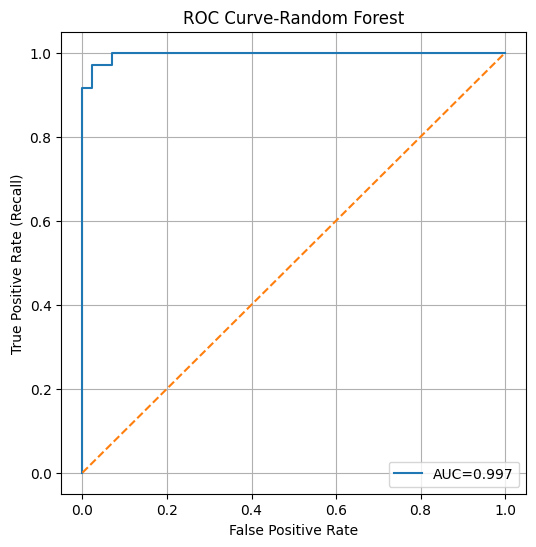

AUC Score: 0.9967245332459875


In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob=rf_tuned.predict_proba(X_test)[:, 1]
fpr, tpr, _=roc_curve(y_test, y_prob)
roc_auc=auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve-Random Forest")
plt.legend()
plt.grid(True)
plt.show()

print("AUC Score:", roc_auc)

In [13]:
import pandas as pd

feat_imp=pd.DataFrame({
    'Feature':data.feature_names,
    'Importance':rf_tuned.feature_importances_
}).sort_values(by='Importance', ascending=False)

feat_imp.head(10)

,Feature,Importance
23,worst area,0.131873
27,worst concave points,0.129474
22,worst perimeter,0.122917
7,mean concave points,0.119574
20,worst radius,0.072155
6,mean concavity,0.055972
0,mean radius,0.050619
3,mean area,0.041651
26,worst concavity,0.041522
2,mean perimeter,0.040215
